<a href="https://colab.research.google.com/github/Kwikilang/MeXEE402_Finals_Catambay_4101/blob/main/Eyes_Blur_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [115]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P /content/
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

--2024-12-12 23:41:55--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘/content/haarcascade_eye.xml.8’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.02s   

2024-12-12 23:41:56 (13.6 MB/s) - ‘/content/haarcascade_eye.xml.8’ saved [341406/341406]



### Create Eye Cascade

In [116]:
# Update the path to the Haar cascade XML file to a known valid location.
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

### Uploading Image

In [117]:
# Upload an image (replace 'portrait.jpg' with your image file)
from google.colab import files
uploaded = files.upload()

image_name = list(uploaded.keys())[0] # Get the uploaded file name


Saving 462579487_553744557482060_15663316665396625_n.jpg to 462579487_553744557482060_15663316665396625_n (7).jpg


### Show Image

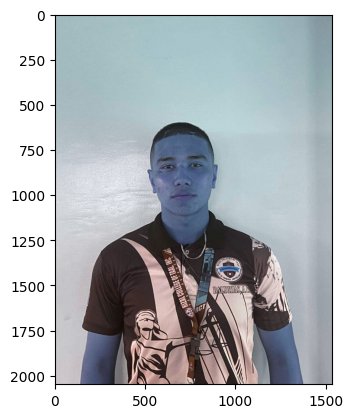

In [118]:
# Load the Image
img = cv2.imread(image_name)
plt.imshow(img)

### APPLYING MEDIAN BLUR TO DETECT FACE

In [124]:
# Apply median blur (ksize is the kernel size, must be odd)
# Assuming 'img' is the source image from previous cells
image = img  # Assign the 'img' variable to 'image'
blurred_image = cv2.medianBlur(image, ksize=21)

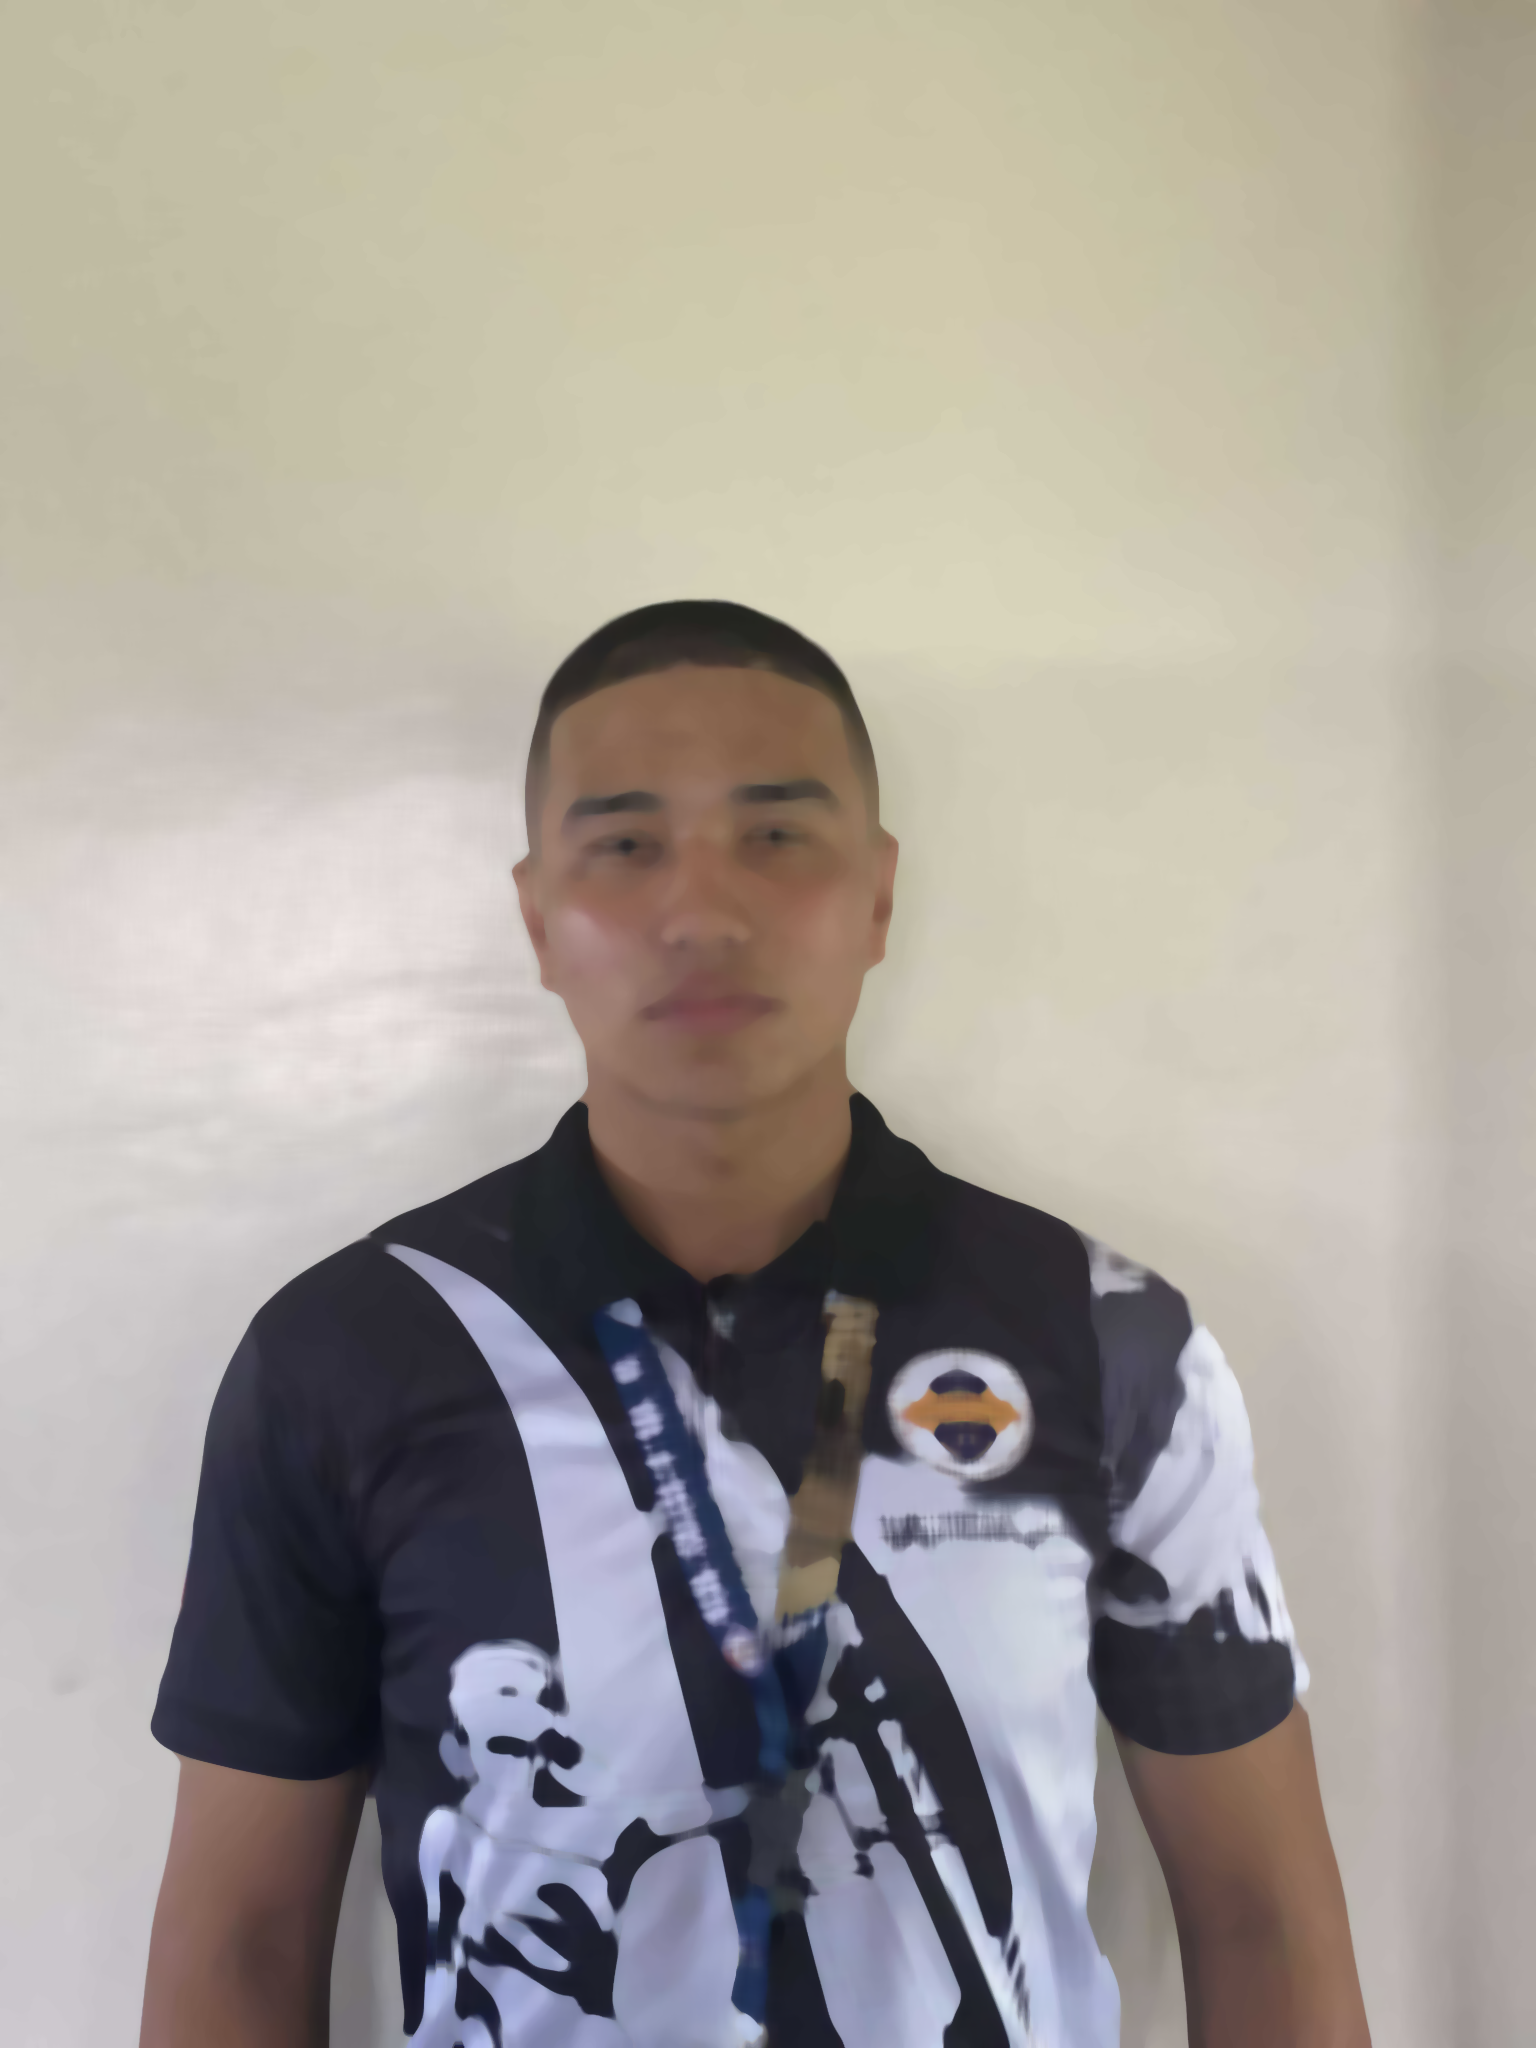

In [125]:
# Display the original and blurred images
# Commented out the problem code (cv2.imshow())
# cv2.imshow('Original Image', image)
# cv2.imshow('Median Blurred Image', blurred_image)

# Instead, using cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow
cv2_imshow(blurred_image) # Display the blurred image

### Detecting Eyes



In [126]:
eyes = eye_cascade.detectMultiScale(img, cv2.COLOR_BGR2RGB)

### Fix Image Color

In [127]:
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Show Image

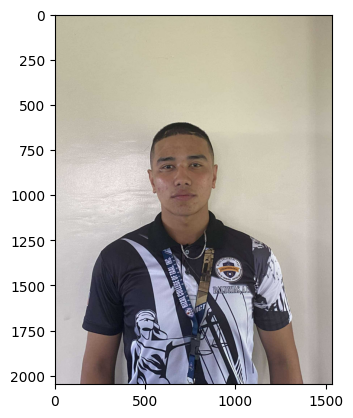

In [128]:
plt.imshow(fix_img)

### APPLY GAUSSIAN BLUR TO DETECTED EYES


In [133]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# Apply blur to detected eyes
for (x, y, w, h) in eyes:
    roi = img[y:y+h, x:x+w]
    roi = cv2.GaussianBlur(roi, (21, 21), 30)
    img[y:y+h, x:x+w] = roi

### Results

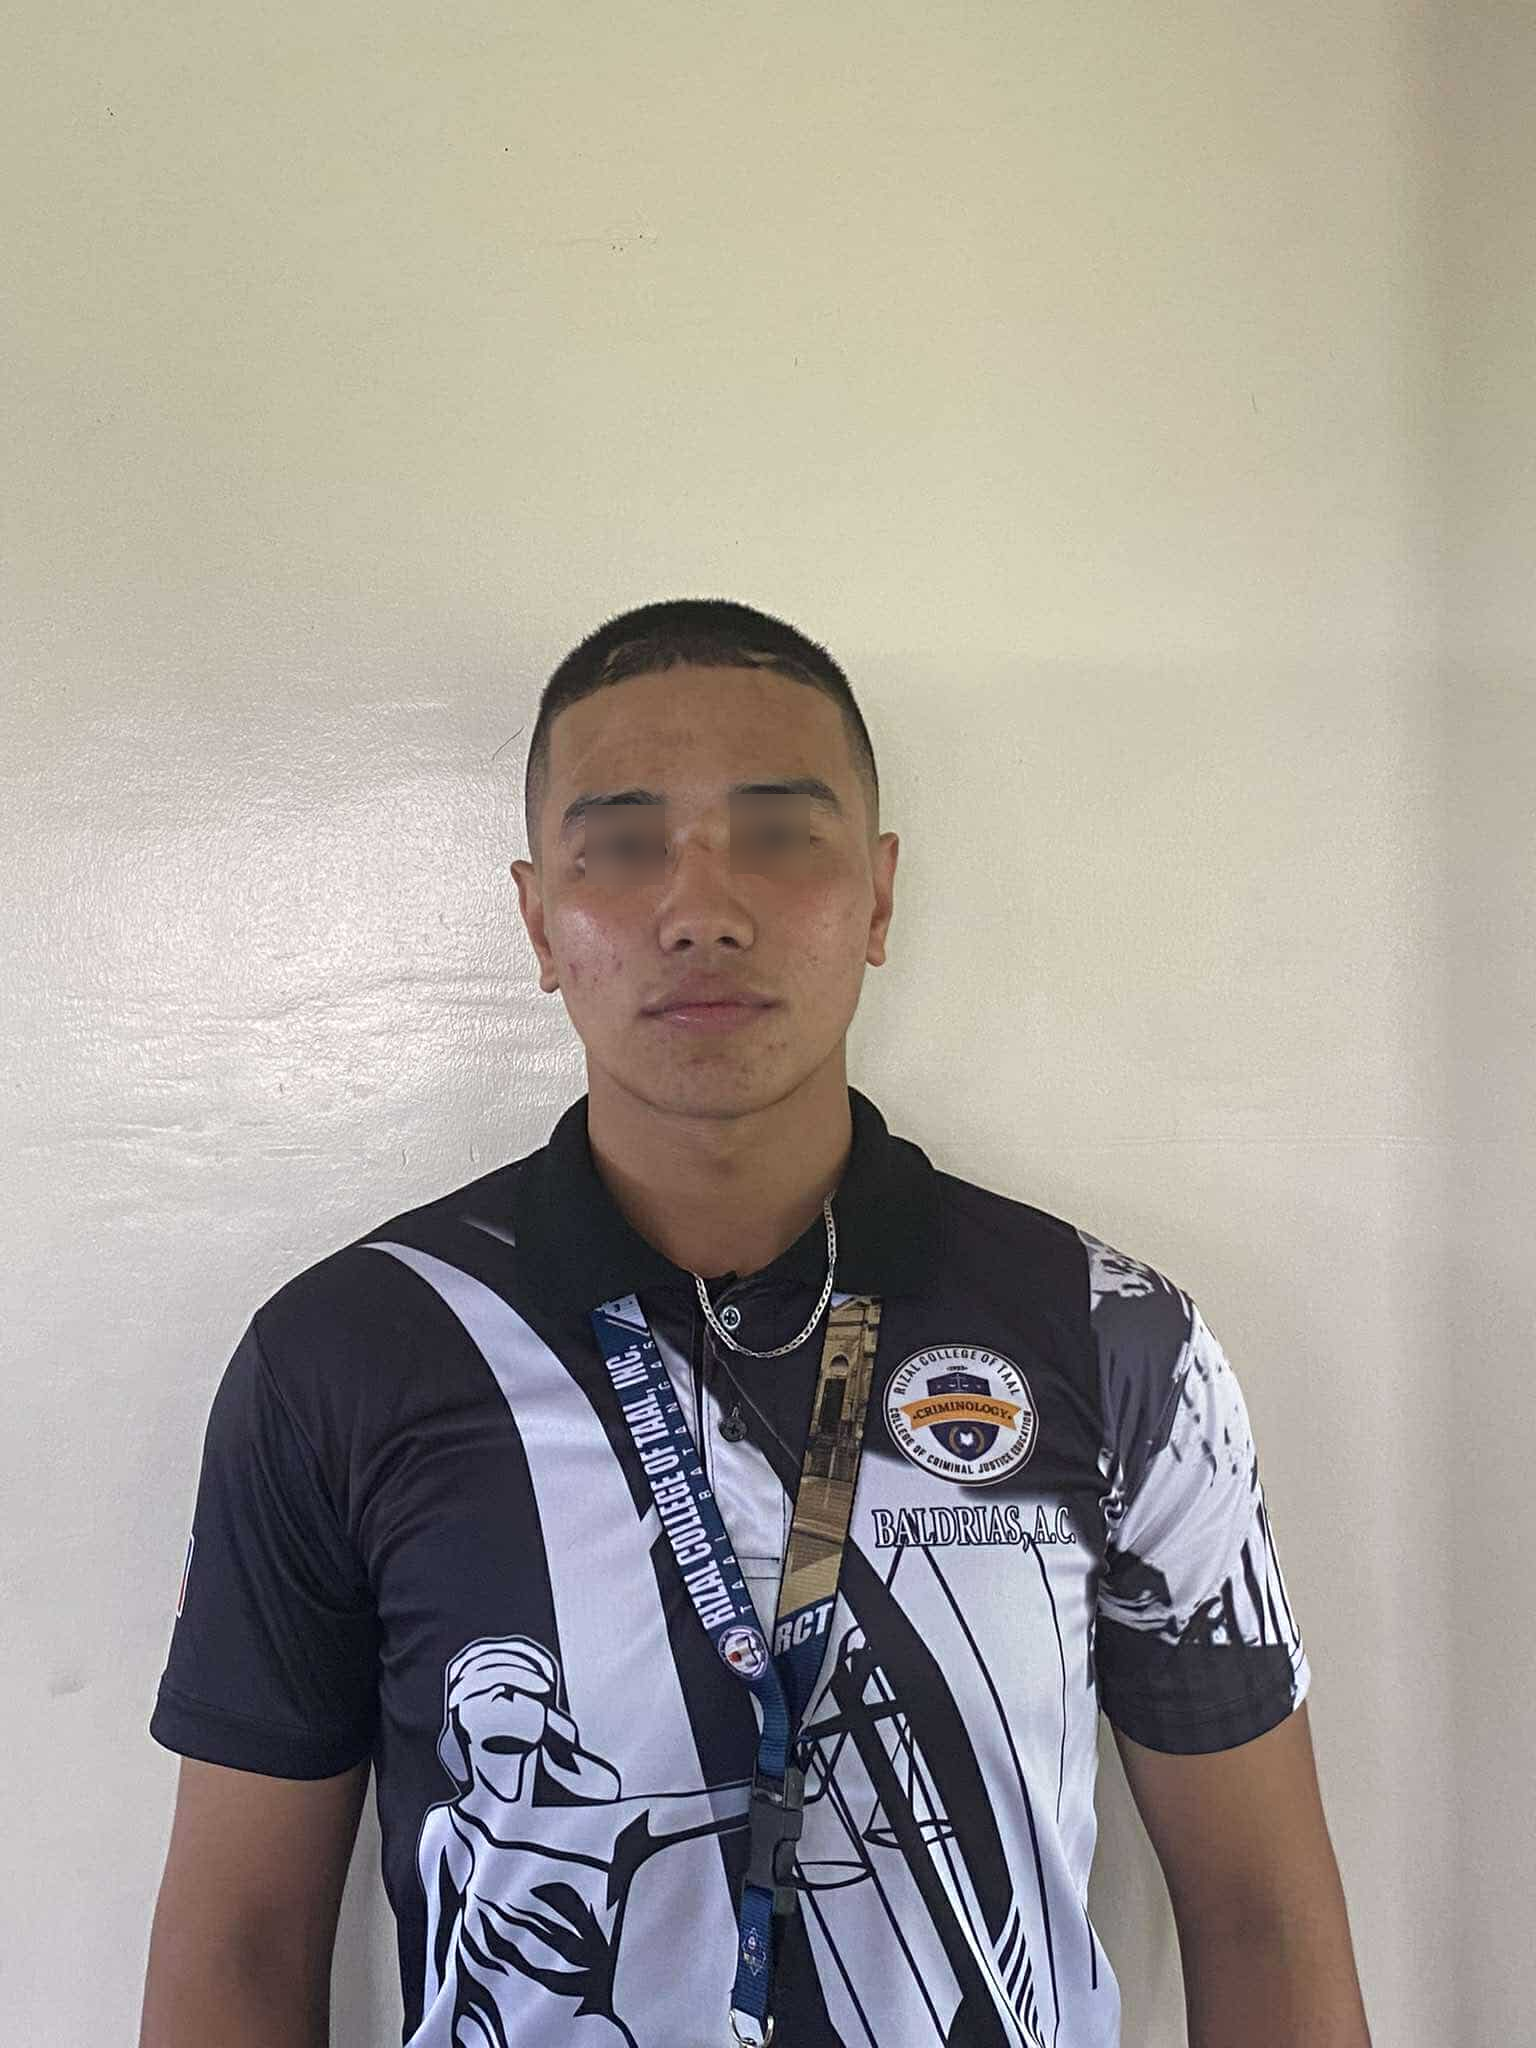

In [134]:
# Display the output using cv2_imshow instead of cv2.imshow
from google.colab.patches import cv2_imshow # Import cv2_imshow if not already imported
cv2_imshow(img) # Use cv2_imshow to display the image
# cv2.imshow('img', img) # This line is causing the error
# cv2.waitKey()
# cv2.destroyAllWindows()